<a href="https://colab.research.google.com/github/arunav93/Capstone-Project-Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_New_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**We will approach the problem by following the steps as mentioned below:**
1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll focus on the dependent variable ('Churn') and try to know a bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data and categorical variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

In [2]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/Telecom Churn Prediction – Arunav Goswami/Copy of Telecom Churn.csv'
df=pd.read_csv(file_path)

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Here we will analyze the key factors responsible for customers leaving the subscription. We will check each variable and its dependency on the Churn variable.

# Data Exploration

First let us look at the data ...

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There is a total of 3333 rows and 20 variables. It seems that there is no missing data in the dataset.

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [9]:
# check unique values of each column
unique_column_values = {}
for column in df.columns:
  value = {'column_name':column, 'frquency': len(df[column].unique())}
  unique_column_values[column] = value
pd.DataFrame(unique_column_values.values()).sort_values('frquency')

,column_name,frquency
19,Churn,2
3,International plan,2
4,Voice mail plan,2
2,Area code,3
18,Customer service calls,10
16,Total intl calls,21
5,Number vmail messages,46
0,State,51
7,Total day calls,119
13,Total night calls,120


# Make some new variables

# Looking deep inside data

**Check corelation between columns -**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Correlations between variables')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


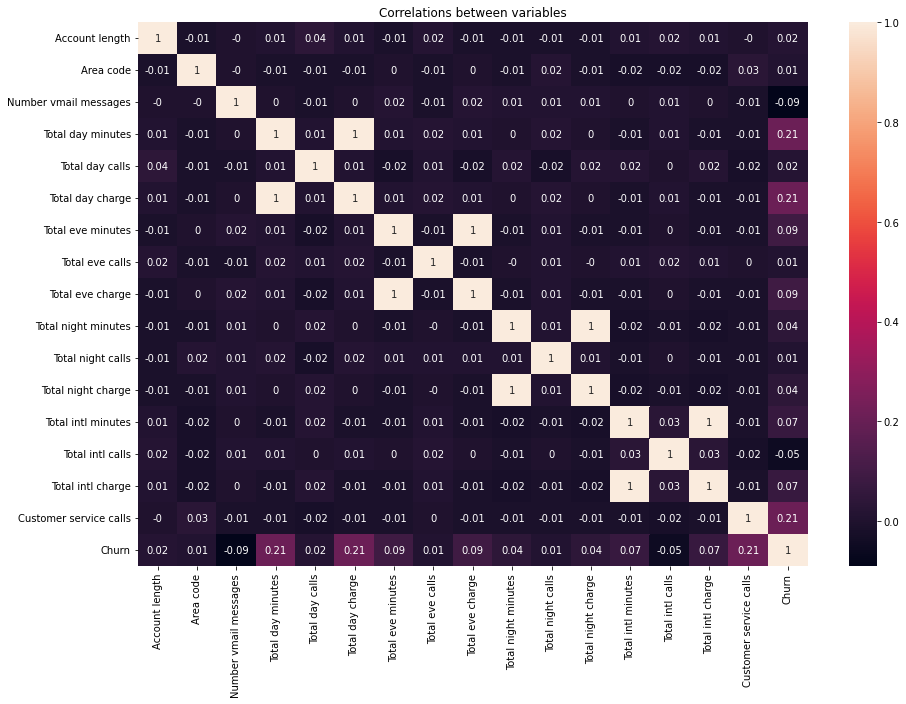

In [10]:
corr=df.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.title('Correlations between variables')

**we can see strong correlation between the variables:**

1. Total day minutes vs total day charge
2. Total eve minues vs total eve charge
3. Total night minutes vs total night charge
4. Total intl minutes vs total intl charge

Therefore we can choose any one variable from each pair for analyzing the churn.


In [11]:
# create a new dataframe one variable from each pair
new_df = df.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1)


**First things first: analysing 'Churn'**

'Churn' is our dependent variable. We will analyse churn to get some insight into it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Churn count')

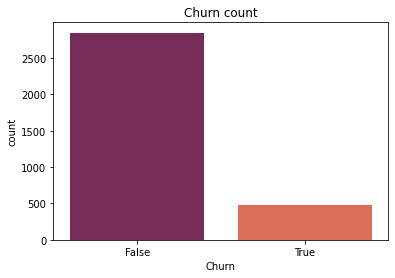

In [12]:
sns.countplot(new_df['Churn'],palette='rocket')
plt.title('Churn count')

We can observe that few customers are leaving the subscription. Let's calculate the percentage of churn.

Text(0.5, 1.0, 'Overall Churn Rate')

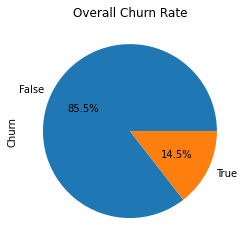

In [13]:
new_df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Overall Churn Rate')

It can be seen that 14.5% of customers are leaving the subscription.

Since the data has 19 independent variables, it will take time to analyze every variable. So, we will find the correlation between Churn and other continuous variables and analyze those variables that have a high correlation to Churn.

In [14]:
new_df.corr()['Churn'][:-1].sort_values(ascending=False)

Customer service calls    0.208750
Total day minutes         0.205151
Total eve minutes         0.092796
Total intl minutes        0.068239
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

From the above, we can see that the variables **Customer service calls** and **Total day minutes** are slightly related to Churn. As for the other variables the correlation is negligible.


Now let's check variable **Customer service calls**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total no. of Customer service calls count')

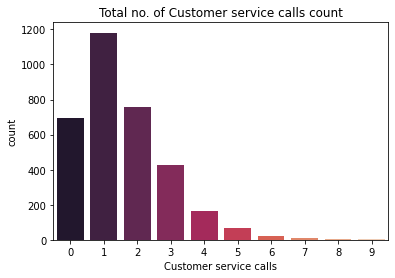

In [15]:
# Frequency of Customer service calls
sns.countplot(new_df['Customer service calls'],palette='rocket')
plt.title('Total no. of Customer service calls count')

Most Customers calls customer service only one time. Some fewer customers call customer service multiple times. 

In [16]:
# calculating churn percentage by number of customer calls
dict_service_calls = {}
def customer_service(row):
  calls = row['Customer service calls']
  if not dict_service_calls.get(calls,False):
    dict_service_calls[calls] = {'calls':calls,'total_customers':0,'churn':0}    

  dict_service_calls[calls]['total_customers'] += 1
  if row['Churn'] == True:
    dict_service_calls[calls]['churn'] += 1

new_df.apply(lambda x:customer_service(x), axis=1 )
df_service_calls = pd.DataFrame(dict_service_calls.values())
df_service_calls['churn_per'] = df_service_calls['churn']/(df_service_calls['total_customers'])*100
df_service_calls.sort_values('churn_per', ascending=False,inplace=True)
df_service_calls

,calls,total_customers,churn,churn_per
7,9,2,2,100.000000
8,6,22,14,63.636364
5,5,66,40,60.606061
6,7,9,5,55.555556
9,8,2,1,50.000000
4,4,166,76,45.783133
1,0,697,92,13.199426
2,2,759,87,11.462451
0,1,1181,122,10.330229
3,3,429,44,10.256410


Text(0.5, 1.0, 'Calls vs churn rate')

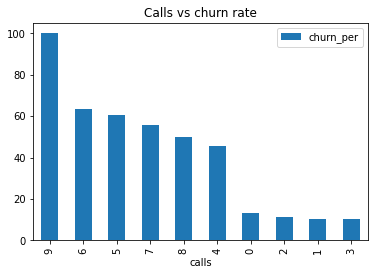

In [17]:
df_service_calls.plot(x='calls',y='churn_per', kind='bar')
plt.title('Calls vs churn rate')

From the above dataset, we observe the following -

1.   The customers who have called more than 3 calls have a more than 45% chance of leaving the subscription.
2.   The customers who have called less than or equal to 3 calls have a maximum 13% chance of discontinuing the subscription.

**So, we can conclude that churn rate increases with an increase in customer service calls**

Now let's check variable **Total day minutes**

In [18]:
new_df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

It can be seen that there are customers with 0 talk time and are also customers who have spent 350 minutes on calls.

In [19]:
new_df.groupby('Churn').agg({'Total day minutes':'mean'})

,Total day minutes
Churn,
False,175.175754
True,206.914079


The average talk time of non-churn customers is 175.17 minutes and churn customers is 206.91 minutes.

Text(0.5, 1.0, 'Box plot of total day minutes for non churn customers')

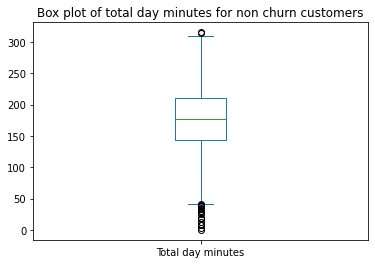

In [20]:
df[df['Churn'] == False]['Total day minutes'].plot(kind='box')
plt.title('Box plot of total day minutes for non churn customers')

Text(0.5, 1.0, 'Box plot of total day minutes for churn customers')

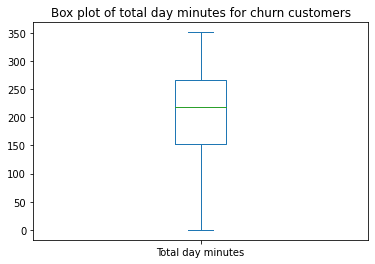

In [21]:
df[df['Churn'] == True]['Total day minutes'].plot(kind='box')
plt.title('Box plot of total day minutes for churn customers')

It seems that for non-churn customers there are outliers for total day minutes and for churn customers, there are no outliers.

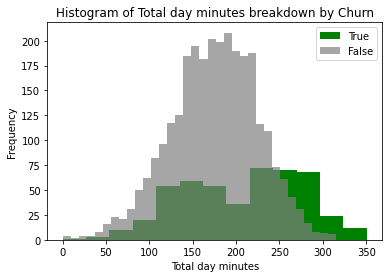

In [22]:
# Histogram of Total day minutes breakdown by Churn
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of Total day minutes breakdown by Churn")
    plt.xlabel("Total day minutes")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.show()
plot_hist_y(new_df['Total day minutes'],new_df.Churn)

**From the above histogram plot, we can observe that customers who have longer talk time in the morning have a high chance of discontinuing the subscription.**

# Looking into categorical varaibles

**Now we will look into the categorical varaibles:**

**1) State:**
      Let chck the top 5 highest and lowest states with customers


In [23]:
# Top 5 State
new_df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [24]:
# Bottom 5 State
new_df['State'].value_counts().tail()

AK    52
LA    51
PA    45
IA    44
CA    34
Name: State, dtype: int64

In [25]:
# state wise customers with churn percentage
state_wise_customers = pd.DataFrame(new_df['State'].value_counts()).reset_index().rename(columns={'index':'State','State':'Total Customers'}).set_index('State')

state_wise_churn = new_df[new_df['Churn'] == True].groupby('State').agg({'Churn':'count'})
frames = [state_wise_customers,state_wise_churn]
state_wise_customer_churn = pd.concat(frames, axis=1).reset_index()
state_wise_customer_churn['churn_percentage'] = state_wise_customer_churn.apply(lambda x:round(x['Churn']/x['Total Customers']*100,2), axis=1)
state_wise_customer_churn.sort_values('churn_percentage', ascending=False)

,State,Total Customers,Churn,churn_percentage
50,CA,34,9,26.47
19,NJ,68,18,26.47
13,TX,72,18,25.00
16,MD,70,17,24.29
36,SC,60,14,23.33
10,MI,73,16,21.92
26,MS,65,14,21.54
23,WA,66,14,21.21
22,NV,66,14,21.21
31,ME,62,13,20.97


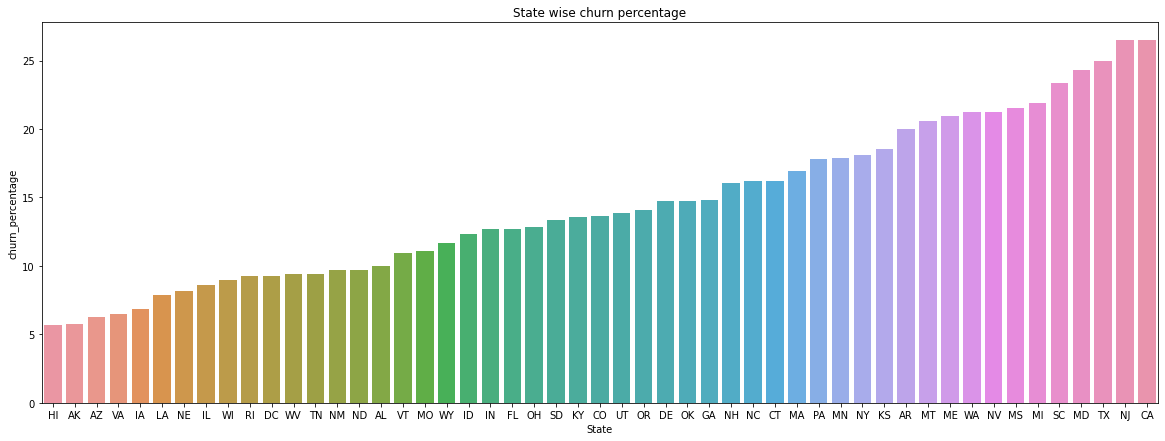

In [26]:
# State wise churn percentage
plt.figure(figsize=(20,7))
plt.title("State wise churn percentage")
sns.barplot(x='State',y='churn_percentage',data=state_wise_customer_churn.sort_values('churn_percentage'))

It is clear that CA(California) and NJ(New Jersey) has the highest churn percentage and HI(Hawaii) & Ak(Alaska) has the lowest churn percentage. 

**2) Area:**

In [27]:
new_df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

There are 3 area codes available in the data. 415 has the highest customers & 408 has the lowest customers.

In [28]:
area_wise_churn = new_df[['Area code','Churn']].value_counts().unstack()
area_wise_churn

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


Text(0.5, 1.0, 'Area Wise Churn & Non Churn')

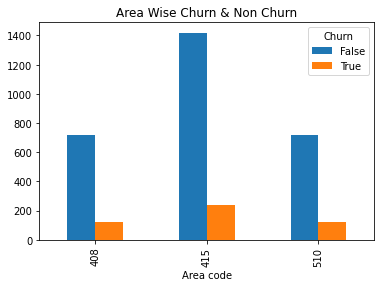

In [29]:

area_wise_churn.plot(kind='bar')
plt.title('Area Wise Churn & Non Churn')

In [30]:
area_wise_churn.columns

Index([False, True], dtype='object', name='Churn')

In [31]:
area_wise_churn

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


In [32]:
# Calculate area wise churn percentage
area_wise_churn = area_wise_churn.reset_index().rename(columns={False:'Non Churn',True:'Churn'}).set_index('Area code')
area_wise_churn['churn_per'] = area_wise_churn['Churn']/(area_wise_churn['Churn']+area_wise_churn['Non Churn'])*100
area_wise_churn

Churn,Non Churn,Churn,churn_per
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


**Since the churn percentage is almost the same in all the area codes, we can conclude that the churn rate is not dependent on the area code.**

**3) International plan**

In [33]:
new_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Most of the customers have no international plan.

In [34]:
international_plan = df[['International plan','Churn']].value_counts().unstack()
international_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


Text(0.5, 1.0, 'Internaton Plan wise Churn & Non Churn')

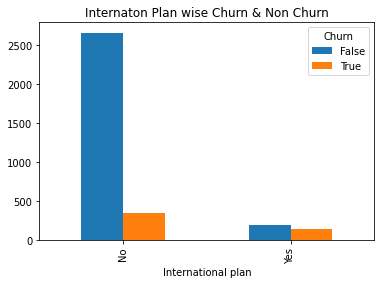

In [35]:
international_plan.plot(kind='bar')
plt.title('Internaton Plan wise Churn & Non Churn')

In [36]:
# churn rate for customers with no international plan 
round(international_plan.iloc[0,1]/(international_plan.iloc[0,0]+international_plan.iloc[0,1])*100,2)

11.5

In [37]:
# churn rate for customers with international plan 
round(international_plan.iloc[1,1]/(international_plan.iloc[1,0]+international_plan.iloc[1,1])*100,2)

42.41

We can see that the customers with an international plan have a high chance of leaving the subscription. It may be due to customers not being happy with international plans. So, why are customers with international plans discontinued? Now let's compare the call charge for international vs non-international plans.


In [38]:
international_plan_customers = df[df['International plan'] == 'Yes']
international_no_plan_customers = df[df['International plan'] == 'No']

In [39]:
# call charge per minute for customers with international plan
international_plan_charge = (international_plan_customers['Total intl charge'] / international_plan_customers['Total intl minutes']).mean()
international_plan_charge

0.27003827243897816

In [40]:
# call charge per minute for customers with no international plan
international_no_plan_charge = (international_no_plan_customers['Total intl charge'] / international_no_plan_customers['Total intl minutes']).mean()
international_no_plan_charge

0.27005851825103055

From the above analysis, we can conclude that even if a customer takes an international plan the call charge is the same as customers without an international plan.




Is a customer with an international plan who spent more time on international calls having the highest chance of leaving or not?

Now, let's check the varaible Total intl minutes

In [41]:
new_df[(new_df['International plan'] == 'Yes')]['Total intl minutes'].describe()

count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: Total intl minutes, dtype: float64

In [42]:
# Churn rate for customers with international plan and talktime above 11 minutes
round(new_df[(new_df['International plan'] == 'Yes') & (new_df['Total intl minutes'] >= 12) & (new_df['Churn'] == True)]['Total intl minutes'].count() / new_df[(new_df['International plan'] == 'Yes')  & (new_df['Total intl minutes'] >= 12) ]['Total intl minutes'].count()*100,2)

70.97

In [43]:
# Churn rate for customers with international plan and talktime less than 12 minutes
round(new_df[(new_df['International plan'] == 'Yes') & (new_df['Total intl minutes'] < 12) & (new_df['Churn'] == True)]['Total intl minutes'].count() / new_df[(new_df['International plan'] == 'Yes')  & (new_df['Total intl minutes'] < 12) ]['Total intl minutes'].count()*100,2)

30.87

For the customers having International Plan those with longer talk time (>=12 min) have a higher chance of leaving than those with less talk time.

**4) Voice mail plan**

In [44]:
# Voice mail plan
new_df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

Most of the customers have no voice mail plan.

In [45]:
voice_plan_churn = new_df[['Voice mail plan','Churn']].value_counts().unstack()
voice_plan_churn

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


Text(0.5, 1.0, 'Voice Mail Plan wise Churn & Non Churn')

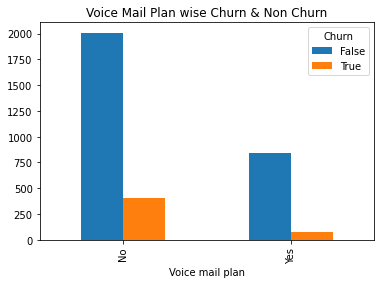

In [46]:
voice_plan_churn.plot(kind='bar')
plt.title('Voice Mail Plan wise Churn & Non Churn')

In [47]:
# churn rate for customers with no voice mail plan 
round(voice_plan_churn.iloc[0,1]/(voice_plan_churn.iloc[0,0]+voice_plan_churn.iloc[0,1])*100,2)

16.72

In [48]:
# churn rate for customers with voice mail plan 
round(voice_plan_churn.iloc[1,1]/(voice_plan_churn.iloc[1,0]+voice_plan_churn.iloc[1,1])*100,2)

8.68

We can see that for the customers with no voice mail plan, there is some chance of leaving the subscription.

# Observation

**From the above EDA, we can observe that:**
1.  Churn rate increases with an increase in customer service calls.
2.  Customers with longer talk time in the morning have high chance of discontinuing the subscription.
3.  High population area has a high churn rate.
4.  Customers with an international plan, have high chance of leaving the subscription. It increases even more for those with longer international calls.
5.  For customers with no voice mail plan, the chance of discontinuing the subscription is greater than those with voice mail plan.